We know that N1sg N2pl Vpl is more freq. than N1pl N2sg Vsg. An SOSP-TH model that learns feature vectors based on a corpus will make therefore make N1sg N2pl Vpl have a higher harmony than N1pl N2sg Vsg.

Still use number from version 00, though.

In [1]:
# Importing and setting up
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # additional plotting tools
from sosp import simple
from itertools import product

In [2]:
cond_names = ['sg-sg', 'sg-pl', 'pl-sg', 'pl-pl']
gamma = 0.4

In [3]:
# Like we've done before: dims = N1#, N2#, V#, 0 = sg, 1 = pl
centers = np.array(list(product([0, 1], repeat=3)))
centers

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [12]:
center_names = ['sss', 'ssp', 'sps', 'spp', 'pss', 'psp', 'pps', 'ppp']

In [5]:
# Here, we assume the parser will choose the highest-harmony parse it can, so we only need to specify the h_i once
# Assume number and markedness feature
fm = 0.01
ml = 0.8  # 0.8 used for EI, 0.2 used for old sims. of this.
marked = 0.2
noise_mag = 0.0075
harmonies = [1, fm, 1, ml, ml, 1, fm, 1]
cond_harmonies = np.array([harmonies] * len(cond_names))
cond_harmonies

array([[1.  , 0.01, 1.  , 0.8 , 0.8 , 1.  , 0.01, 1.  ],
       [1.  , 0.01, 1.  , 0.8 , 0.8 , 1.  , 0.01, 1.  ],
       [1.  , 0.01, 1.  , 0.8 , 0.8 , 1.  , 0.01, 1.  ],
       [1.  , 0.01, 1.  , 0.8 , 0.8 , 1.  , 0.01, 1.  ]])

In [6]:
# Specifying init. conds.; assume equidistant between V #s
init = np.array([[0, 0, 0.5], [0, 1, 0.5], [1, 0, 0.5], [1, 1, 0.5]])

In [7]:
sys = simple.SimpleModel(corpus_filename=None, centers=centers, local_harmonies=cond_harmonies[0,],
                         stopping_crit='cheb_stop')
sys.set_gamma(gamma)
sys.set_noise_mag(noise_mag)
sys.set_tol(0.1)

In [111]:
sys.locate_attrs()
print(sys.attrs)

Found 6 unique attractors from 8 centers
[[0.02 0.86 0.09]
 [0.09 0.14 0.02]
 [0.18 0.96 0.82]
 [0.82 0.04 0.18]
 [0.91 0.86 0.98]
 [0.98 0.14 0.91]]


In [112]:
data = sys.run_multiple_conditions(n_runs=2000, conditions=cond_harmonies, init_cond=init)

Found 6 unique attractors from 8 centers
Condition 0
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 6 unique attractors from 8 centers
Condition 1
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 6 unique attractors from 8 centers
Condition 2
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 6 unique attractors from 8 centers
Condition 3
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] 

In [113]:
cond_dict = {i: n for i, n in zip(range(len(cond_names)), cond_names)}
center_dict = {i: n for i, n in zip(range(len(center_names)), center_names)}
data['Condition'] = data.Condition.map(cond_dict)
data['Center'] = data.CenterNr.map(center_dict)

In [114]:
print(data.groupby(['Condition', 'Center']).agg(['count']))
print(data.groupby(['Condition']).Time.agg(['mean', 'std']))

                 CenterNr  Time
                    count count
Condition Center               
pl-pl     ppp        2000  2000
pl-sg     psp        1986  1986
          pss          14    14
sg-pl     spp          16    16
          sps        1984  1984
sg-sg     sss        2000  2000
              mean        std
Condition                    
pl-pl      39.1130   9.181469
pl-sg      95.1555  40.571497
sg-pl      95.6665  38.189272
sg-sg      39.3545   9.663463


In [16]:
def split_n1(row):
    if 'sg-' in row['Condition']:
        return 'N1sg'
    elif 'pl-' in row['Condition']:
        return 'N1pl'


def split_n2(row):
    if '-sg' in row['Condition']:
        return 'N2sg'
    elif '-pl' in row['Condition']:
        return 'N2pl'

In [117]:
data['N1Nr'] = data.apply(lambda row: split_n1(row), axis=1)
data['N2Nr'] = data.apply(lambda row: split_n2(row), axis=1)

In [118]:
data.head()

,CenterNr,Time,Condition,Center,N1Nr,N2Nr
0,0,41,sg-sg,sss,N1sg,N2sg
0,0,49,sg-sg,sss,N1sg,N2sg
0,0,32,sg-sg,sss,N1sg,N2sg
0,0,25,sg-sg,sss,N1sg,N2sg
0,0,29,sg-sg,sss,N1sg,N2sg


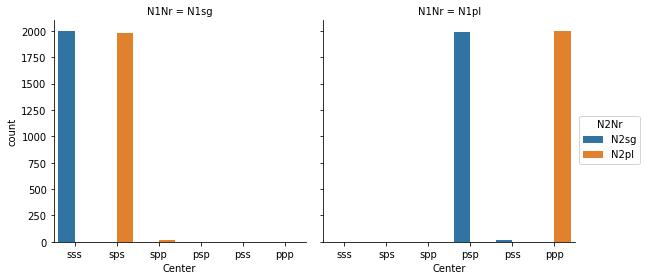

In [119]:
g = sns.factorplot(x='Center', hue='N2Nr', col='N1Nr', data=data, kind='count')
#plt.ylabel('Pr. of selecting N2-headed parse')
#plt.show()

In [ ]:
#g.savefig('VanillaAgrAttr.pdf')

In [22]:
from scipy.stats import chi2_contingency
chi2_contingency(np.array([[1986, 14], [1984, 16]]), correction=False)

(0.1343408900083963, 0.7139730412960049, 1, array([[1985.,   15.],
        [1985.,   15.]]))

In [9]:
# Now doing plural markedness
harmonies2 = [1, fm, 1, ml, 0.75*ml, 1, 0.75*fm, 1]
print(harmonies2)

[1, 0.01, 1, 0.8, 0.6000000000000001, 1, 0.0075, 1]


In [10]:
cond_harmonies2 = np.array([harmonies2] * len(cond_names))
sys2 = simple.SimpleModel(corpus_filename=None, centers=centers, local_harmonies=cond_harmonies2[0,],
                         stopping_crit='cheb_stop')
sys2.set_gamma(gamma)
sys2.set_noise_mag(noise_mag)
sys2.set_tol(0.1)

data2 = sys2.run_multiple_conditions(n_runs=2000, conditions=cond_harmonies2, init_cond=init)

Found 6 unique attractors from 8 centers
Condition 0
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 6 unique attractors from 8 centers
Condition 1
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 6 unique attractors from 8 centers
Condition 2
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 6 unique attractors from 8 centers
Condition 3
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] 

NameError: name 'cond_dict' is not defined

In [13]:
cond_dict = {i: n for i, n in zip(range(len(cond_names)), cond_names)}
center_dict = {i: n for i, n in zip(range(len(center_names)), center_names)}
data2['Condition'] = data2.Condition.map(cond_dict)
data2['Center'] = data2.CenterNr.map(center_dict)

In [17]:
data2['N1Nr'] = data2.apply(lambda row: split_n1(row), axis=1)
data2['N2Nr'] = data2.apply(lambda row: split_n2(row), axis=1)

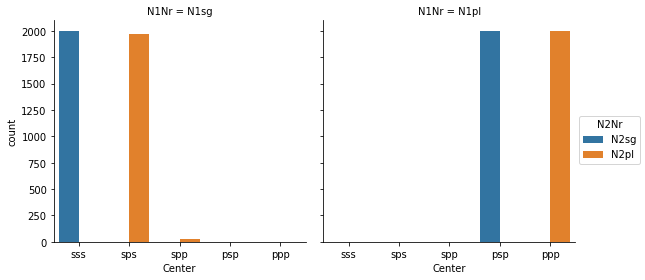

In [18]:
g2 = sns.factorplot(x='Center', hue='N2Nr', col='N1Nr', data=data2, kind='count')

In [19]:
print(data2.groupby(['Condition', 'Center']).agg(['count']))
print(data2.groupby(['Condition']).Time.agg(['mean', 'std']))

                 CenterNr  Time  N1Nr  N2Nr
                    count count count count
Condition Center                           
pl-pl     ppp        2000  2000  2000  2000
pl-sg     psp        2000  2000  2000  2000
sg-pl     spp          25    25    25    25
          sps        1975  1975  1975  1975
sg-sg     sss        2000  2000  2000  2000
              mean        std
Condition                    
pl-pl      38.4985   9.350065
pl-sg      66.2465  18.223742
sg-pl      95.5855  39.829234
sg-sg      40.2510   9.401553


In [23]:
chi2_contingency(np.array([[2000, 0], [1975, 25]]), correction=False)

(25.157232704402517, 5.284110250147627e-07, 1, array([[1987.5,   12.5],
        [1987.5,   12.5]]))

In [20]:
cond_harmonies2

array([[1.    , 0.01  , 1.    , 0.8   , 0.6   , 1.    , 0.0075, 1.    ],
       [1.    , 0.01  , 1.    , 0.8   , 0.6   , 1.    , 0.0075, 1.    ],
       [1.    , 0.01  , 1.    , 0.8   , 0.6   , 1.    , 0.0075, 1.    ],
       [1.    , 0.01  , 1.    , 0.8   , 0.6   , 1.    , 0.0075, 1.    ]])